(1338, 7)
(1337, 7)


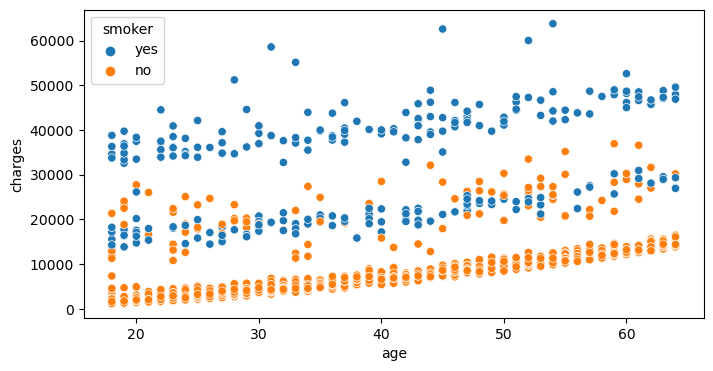

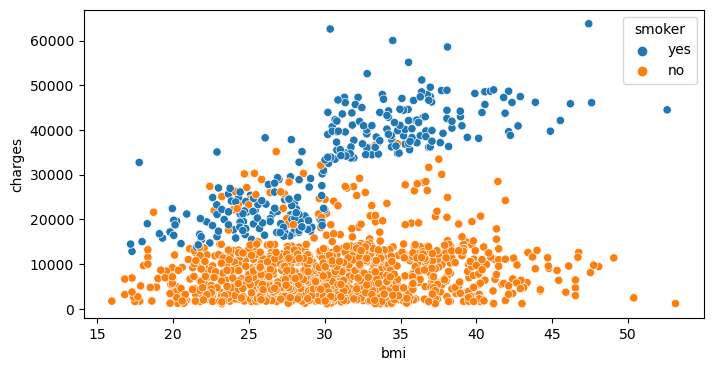

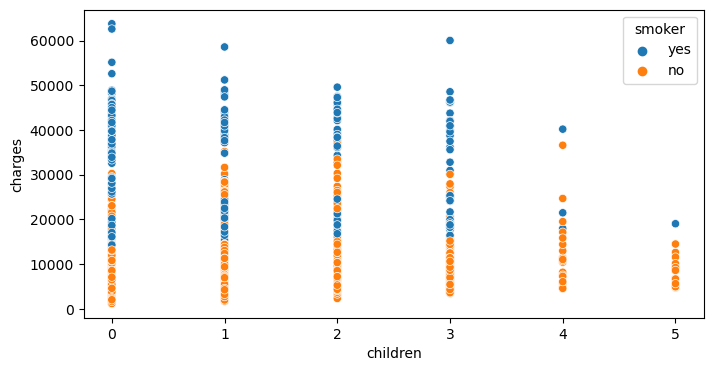

c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


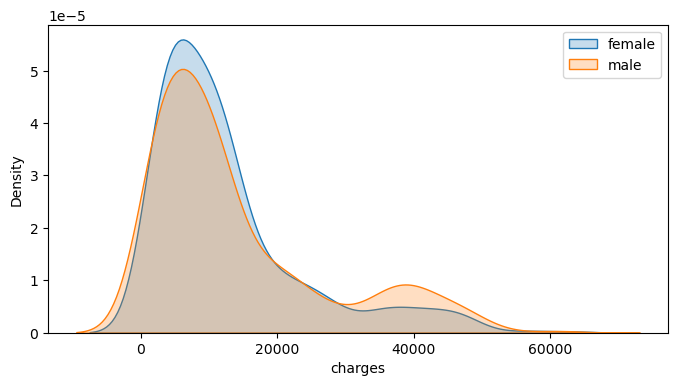

c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


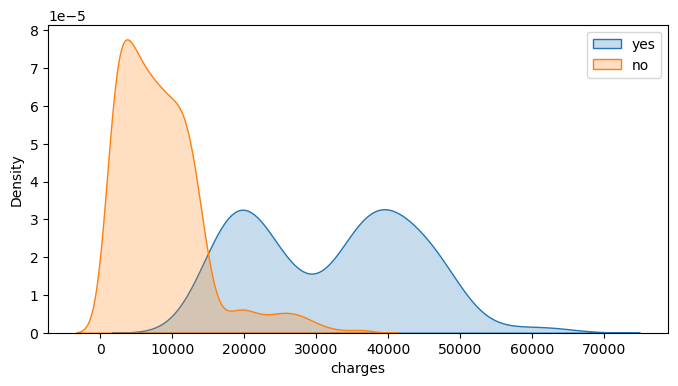

c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

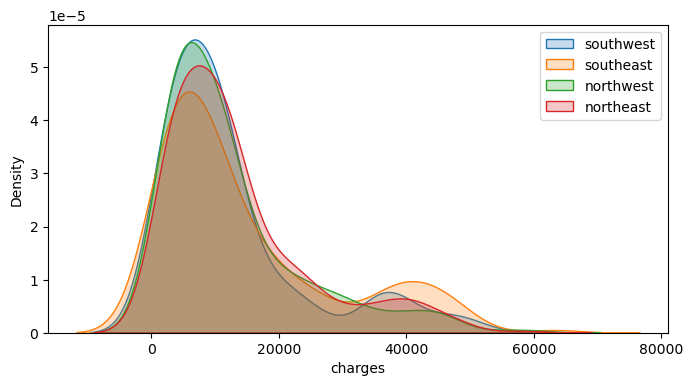

,age,Gender,bmi,smoker
0,19,female,27.900,yes
1,18,male,33.770,no
2,28,male,33.000,no
3,33,male,22.705,no
4,32,male,28.880,no


In [1]:
# Annual Premium charges prediction for Health Insurance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the data set
df = pd.read_csv("insurance.csv")
df.shape
df.describe()
### DAta Cleaning
# check for missing values
df.isnull().sum()
# check for duplicate entries
df.duplicated().sum()
# drop the duplicated rows
print(df.shape)
df.drop_duplicates(keep="first",inplace=True)
print(df.shape)
df.head()
nums = ["age",'bmi','children']
cats = ['Gender','smoker','region']

for col in nums:
    plt.figure(figsize=(8,4))
    sns.scatterplot(df,x=col,y='charges',hue='smoker')
    plt.show()

for col in cats:
    categories = df[col].unique()
    plt.figure(figsize=(8,4))
    for category in categories:
        sns.kdeplot(df['charges'][df[col]==category],label=category,fill=True)
    plt.legend()
    plt.show()


df.columns
x = df[['age', 'Gender', 'bmi', 'smoker']]
y = df['charges']
x.head()


## FEature Preprocessing

In [2]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
ct = ColumnTransformer([("oh",OrdinalEncoder(),[1,3])],remainder='passthrough')
x2 = pd.DataFrame(ct.fit_transform(x),columns=ct.get_feature_names_out())
x2.head()

,oh__Gender,oh__smoker,remainder__age,remainder__bmi
0,0.0,1.0,19.0,27.900
1,1.0,0.0,18.0,33.770
2,1.0,0.0,28.0,33.000
3,1.0,0.0,33.0,22.705
4,1.0,0.0,32.0,28.880


In [3]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x2,y,test_size=0.2,random_state=3)
print(x.shape,xtrain.shape,xtest.shape)

(1337, 4) (1069, 4) (268, 4)


In [4]:
# pip install mlflow
import mlflow
mlflow.set_experiment("insurance-prediction")

uri = "azureml://centralindia.api.azureml.ms/mlflow/v1.0/subscriptions/4635cf04-74fe-475c-8f34-88487881dbc2/resourceGroups/SCB/providers/Microsoft.MachineLearningServices/workspaces/azure-anshu-ml"
mlflow.set_tracking_uri(uri)



mlflow.sklearn.autolog()
# APply Machine Learning: LInear Regression
from sklearn.linear_model import LinearRegression


with mlflow.start_run() as run:
    model = LinearRegression()
    # train the model with the train dataset
    model.fit(xtrain,ytrain)
    # Assessing performance of model on test set
    from sklearn import metrics
    ypred = model.predict(xtest)
    print("R2 Score: Coefficient of Determination ",metrics.r2_score(ytest,ypred))
    print("RMSE ",np.sqrt(metrics.mean_squared_error(ytest,ypred))) 

Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\lib\site-packages\mlflow\store\tracking\file_store.py", line 302, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "c:\ProgramData\anaconda3\lib\site-packages\mlflow\store\tracking\file_store.py", line 395, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "c:\ProgramData\anaconda3\lib\site-packages\mlflow\store\tracking\file_store.py", line 1303, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "c:\ProgramData\anaconda3\lib\site-packages\mlflow\store\tracking\file_store.py", line 1296, in _read_helper
    result = read_yaml(root, file_name)
  File "c:\ProgramData\anaconda3\lib\site-packages\mlflow\utils\file_utils.py", line 303, in read_yaml
    raise MissingConfigException(f"Yaml file '{file_path}' does not exist.")
mlflow.exceptions.MissingConfigException: Yaml file 'D:\Repos\MLOps-with-Azure

R2 Score: Coefficient of Determination  0.7581797001202661
RMSE  5974.199799886046


In [6]:
from sklearn.neural_network import MLPRegressor
with mlflow.start_run() as run:
    model = MLPRegressor(hidden_layer_sizes=(10,5),activation='relu',max_iter=1000)
    # train the model with the train dataset
    model.fit(xtrain,ytrain)
    # Assessing performance of model on test set
    from sklearn import metrics
    ypred = model.predict(xtest)
    print("R2 Score: Coefficient of Determination ",metrics.r2_score(ytest,ypred))
    print("RMSE ",np.sqrt(metrics.mean_squared_error(ytest,ypred))) 

2023/12/19 16:12:34 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\ProgramData\anaconda3\lib\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."
C:\Users\Anshu Pandey\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
2023/12/19 16:12:41 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\ProgramData\anaconda3\lib\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."


R2 Score: Coefficient of Determination  0.1651337879364766
RMSE  11100.481255096403


In [5]:
# new customer: age = 43, bmi = 32, genderMale = 1, smoker = 0
customer = [[43,'male',32,'yes']]
customer = ct.transform(customer)
model.predict(customer)

C:\Users\Anshu Pandey\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
C:\Users\Anshu Pandey\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([33914.92724304])